In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.graphics.regressionplots import influence_plot

In [104]:
df = pd.read_csv(r"C:\Users\Kashi\python\Downloads\50_Startups.csv")

In [105]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [107]:
df = df.rename(columns = {'R&D Spend':'RD', 'Marketing Spend':'Marketing'})


In [108]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['State']= le.fit_transform(df['State'])

In [109]:
df.head()

,RD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [110]:
df.corr()

,RD,Administration,Marketing,State,Profit
RD,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


In [111]:
model = smf.ols('Profit~RD+Administration+Marketing+State', data = df).fit()

In [112]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           8.51e-29
Time:                        21:29:20   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
RD                 0.8058      0.046     17.609      0.000       0.714       0.898
Administration    -0.0268      0.052     -0.520      0.606      -0.131       0.077
Marketing          0.0272      0.017      1.637      0.109      -0.006       0.061
State            -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
ap = smf.ols('Profit~Administration', data = df).fit()
ap.summary()
#not significant 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 21 Nov 2023   Prob (F-statistic):              0.162
Time:                        21:29:20   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
mp = smf.ols('Profit~Marketing', data = df).fit()
mp.summary()
#significant 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.38e-10
Time:                        21:29:20   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing      0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
sp = smf.ols('Profit~State', data = df).fit()
sp.summary()
#notsignificant 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5026
Date:                Tue, 21 Nov 2023   Prob (F-statistic):              0.482
Time:                        21:29:20   Log-Likelihood:                -600.39
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.071e+05   9005.386     11.891      0.000     8.9e+04    1.25e+05
State       4925.6356   6947.806      0.709      0.482   -9043.865    1.89e+04
==============================================================================
Omnibus:                        0.023   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.989   Jarque-Bera (JB):                0.134
Skew:                           0.047   Prob(JB):                        0.935
Kurtosis:                       2.765   Cond. No.                         2.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
fv = smf.ols('Profit~Marketing+Administration', data = df).fit()
fv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.50e-10
Time:                        21:29:20   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Marketing          0.2488      0.030      8.281      0.000       0.188       0.309
Administration     0.3237      0.131      2.468      0.017       0.060       0.588
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
#checking vif for marketing 
v1 = smf.ols('Marketing~Profit+RD+Administration+State', data = df).fit()
v1r = v1.rsquared
vif1 = 1/(1-v1r)
vif1

2.4653350843672355

In [118]:
#checking vif for administration
v2 = smf.ols('Administration~RD+Profit+State+Marketing', data = df).fit()
v2r = v2.rsquared
vif2 = 1/(1-v2r)
vif2

1.1823751199103338

In [119]:
#checking vif for state 
v3 = smf.ols('State~RD+Profit+Marketing+Administration', data = df).fit()
v3r = v3.rsquared
vif3 = 1/(1-v3r)
vif3

1.0112851019642624

In [120]:
df1 = df.copy()

In [121]:
df1 = df1.drop('Administration', axis = 1)


In [130]:
df1 = df1.drop('State', axis = 1)


In [131]:
df1.head()

,RD,Marketing,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94


In [132]:
newmodel = smf.ols('Profit~RD+Marketing', data = df1).fit()
newmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.16e-31
Time:                        21:29:58   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RD             0.7966      0.041     19.266      0.000       0.713       0.880
Marketing      0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

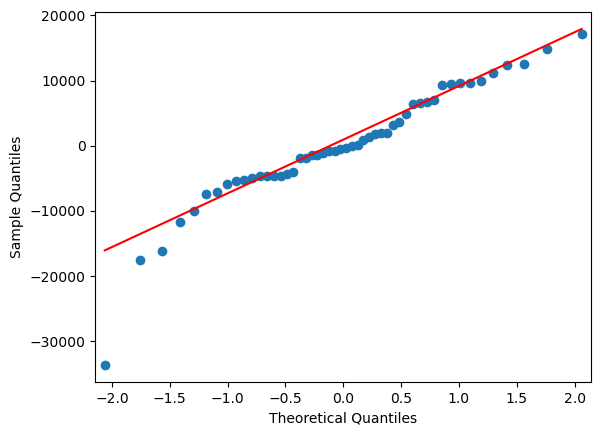

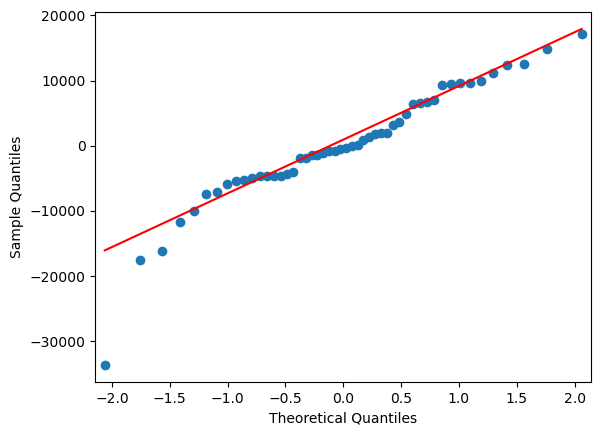

In [123]:
qqplot = sm.qqplot(newmodel.resid,line = 'q')
qqplot

In [124]:
#standardized values for both residuals and fitted values
#creating method 
def standardize1(v):
  eqn = (v - v.mean())/v.std()
  return eqn

In [125]:
newmodel.fittedvalues

0     192800.458625
1     189774.659480
2     181405.378097
3     173441.308842
4     171127.623218
5     162879.310812
6     158028.130454
7     160455.738877
8     152317.803673
9     154343.813935
10    135011.914724
11    134638.870075
12    129218.396579
13    127812.205465
14    150192.491797
15    146032.715433
16    117025.891848
17    130829.444732
18    128882.198828
19    115816.418333
20    116650.892092
21    118384.170709
22    114990.384639
23    109886.185217
24    112552.187151
25    102612.909242
26    110990.792884
27    114978.605150
28    103125.012760
29    102440.424090
30     99085.219562
31     98314.548854
32     98864.662254
33     97600.730445
34     90262.641219
35     89776.494285
36     75824.233912
37     87974.014518
38     68631.318323
39     82924.815275
40     75049.056031
41     74113.888705
42     70234.250574
43     60390.232852
44     65489.729308
45     47829.573980
46     56909.800859
47     46975.864221
48     47407.652602
49     48326.894462


Text(0, 0.5, 'Standardized residual values')

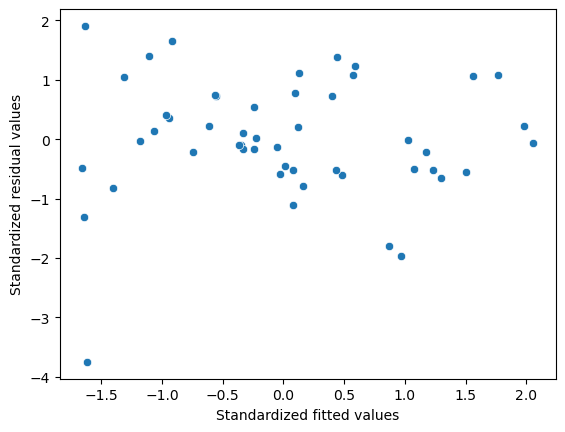

In [126]:
sns.scatterplot (x = standardize1(newmodel.fittedvalues), y = standardize1(newmodel.resid))
plt.xlabel ('Standardized fitted values')
plt.ylabel('Standardized residual values')


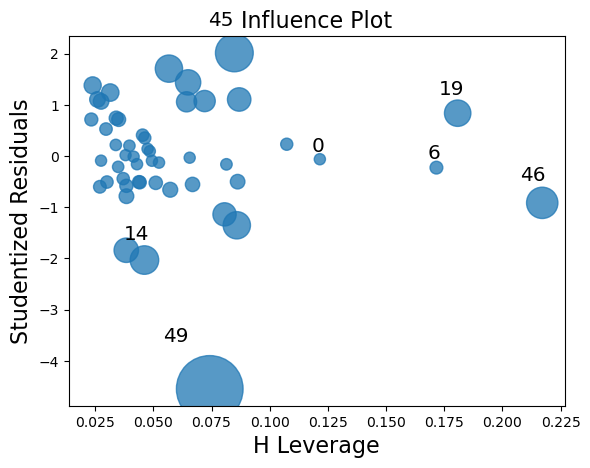

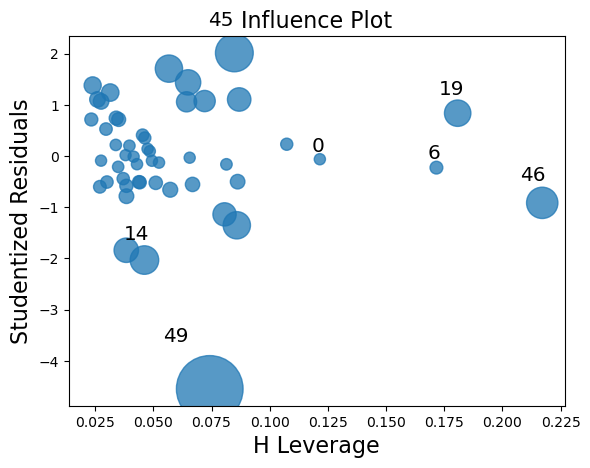

In [127]:
influence_plot(newmodel)

In [133]:
k = df1.shape[1] #no. features
n = df1.shape[0] #no. rows/observations

leverage_cutoff =3*((k+1)/n)

In [134]:
leverage_cutoff

0.24

In [137]:
mfv = newmodel.get_influence() #get influence of every obsveration
(cv,_) = mfv.cooks_distance #generates two arrays, 1 array = cooks distance values, 2 array = pvalues.

In [139]:
mfv.cooks_distance

(array([1.81512394e-04, 2.17714151e-03, 3.85030256e-02, 2.97393985e-02,
        7.43914487e-03, 8.87288175e-03, 3.60799476e-03, 4.97976353e-03,
        2.01902031e-06, 4.00294501e-03, 1.64482064e-02, 1.07062146e-02,
        1.52583172e-02, 4.10195007e-03, 6.23696501e-02, 4.28041217e-02,
        1.08143179e-02, 3.37984862e-03, 2.70426509e-03, 5.18325214e-02,
        5.68610172e-04, 8.25784837e-03, 4.13103131e-03, 3.07888695e-04,
        2.54030757e-03, 2.87274239e-03, 4.56256249e-03, 3.76461096e-02,
        4.04646886e-06, 3.84226278e-04, 1.54537882e-04, 1.49920702e-04,
        7.91098475e-04, 7.81029691e-05, 6.23157729e-03, 6.50961158e-03,
        5.60674443e-02, 5.62367665e-04, 4.68122817e-02, 5.47791686e-04,
        2.06083678e-03, 2.68539324e-03, 3.32631540e-04, 2.55928157e-02,
        2.50014790e-05, 1.17553495e-01, 7.74416953e-02, 7.99827600e-03,
        5.61942095e-02, 3.89488623e-01]),
 array([0.99999657, 0.99985768, 0.98977563, 0.99300145, 0.99910561,
        0.99883656, 0.9996

<StemContainer object of 3 artists>

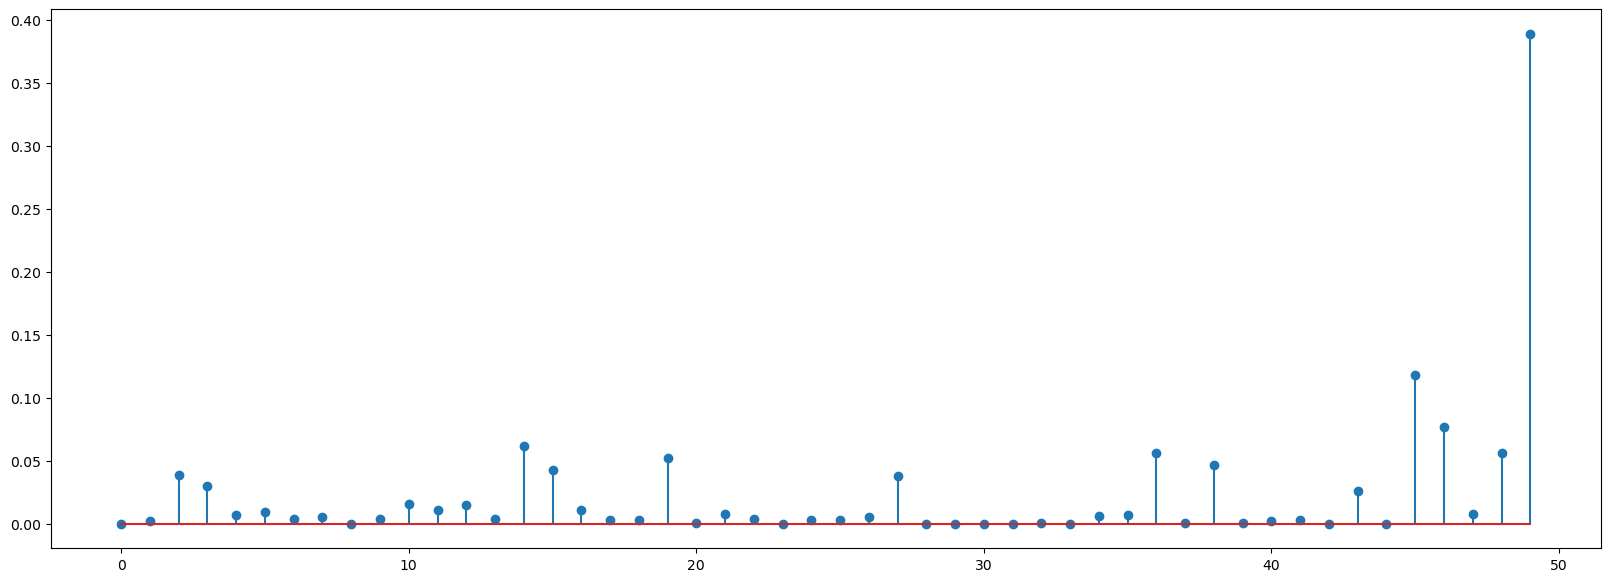

In [140]:
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df1)), np.round(cv,3))